<h1 style="text-align:center">ОИАД. Лабораторная работа №4<h1>

In [147]:
N = 20
binary_cols = ["ss", "interest", "weekend_study", "bad_sleep", "glasses", "anime", "study_form", "literature"]
target_column = binary_cols[N % len(binary_cols)]
target_column

'glasses'

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [149]:
df = pd.read_csv("../datasets/famcs_students.csv")
df.head()

,cource,group,stream,sex,age,ss,interest,os,weekend_study,bad_sleep,...,social,sport,miss,study_form,foot_size,eye_color,score,retake,hostel,literature
0,4,11,Прикладная информатика,М,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Редко, легкая физкультура",3.0,Бюджет,48.0,Карие,9.2,0,"Нет, я из Минска",Да
1,4,11,Прикладная информатика,Ж,20.0,Нет,Программирование,MacOS,Нет,Нет,...,Экстраверт,"Да, я спортсмен",5.0,Бюджет,39.0,Зеленые,8.8,0,"Нет, я из Минска",Да
2,4,11,Прикладная информатика,Ж,19.0,Нет,Программирование,MacOS,Да,Нет,...,Экстраверт,Вообще нет,10.0,Бюджет,41.0,Карие,8.8,0,"Нет, я из Минска",Да
3,4,11,Прикладная информатика,Ж,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Да, я спортсмен",3.0,Бюджет,36.0,Карие,8.8,0,"Нет, я из Минска",Да
4,4,11,Прикладная информатика,М,20.0,Нет,Математика,Windows,Да,Нет,...,Интроверт,Вообще нет,1.0,Бюджет,46.0,Зеленые,9.0,0,"Нет, я из Минска",Да


In [150]:
print(df.dtypes)

cource               int64
group                int64
stream              object
sex                 object
age                float64
ss                  object
interest            object
os                  object
weekend_study       object
bad_sleep           object
glasses             object
work_experience     object
ai                  object
height             float64
anime               object
social              object
sport               object
miss               float64
study_form          object
foot_size          float64
eye_color           object
score              float64
retake              object
hostel              object
literature          object
dtype: object


In [151]:

col_list = ['ss', 'weekend_study', 'bad_sleep', 'anime', 'literature', 'glasses']
for col in col_list:
    df[col] = df[col].map({"Да": 1, "Нет": 0})

df["sex"] = df["sex"].map({"М": 1, "Ж": 0})
df["study_form"] = df["study_form"].map({"Платная" : 1, "Бюджет" : 0} )

categorial_columns = ["stream", "interest", "os", "work_experience", "ai", "social", "sport", "eye_color", "retake", "hostel"]
print(df.columns.tolist())

for column in categorial_columns:
    for feature in df[column].unique():
        new_col = f"{column}_{feature}"
        df[new_col] = (df[column] == feature).astype(int)

print(df.dtypes)
print(type(df["stream"][0]))

['cource', 'group', 'stream', 'sex', 'age', 'ss', 'interest', 'os', 'weekend_study', 'bad_sleep', 'glasses', 'work_experience', 'ai', 'height', 'anime', 'social', 'sport', 'miss', 'study_form', 'foot_size', 'eye_color', 'score', 'retake', 'hostel', 'literature']
cource                         int64
group                          int64
stream                        object
sex                            int64
age                          float64
                              ...   
retake_1                       int64
retake_2+                      int64
hostel_Нет, я из Минска        int64
hostel_Нет, я из регионов      int64
hostel_Да                      int64
Length: 66, dtype: object
<class 'str'>


In [152]:
df = df.drop(columns=categorial_columns)

print(df.dtypes)

cource                               int64
group                                int64
sex                                  int64
age                                float64
ss                                   int64
weekend_study                        int64
bad_sleep                            int64
glasses                              int64
height                             float64
anime                                int64
miss                               float64
study_form                           int64
foot_size                          float64
score                              float64
literature                           int64
stream_Прикладная информатика        int64
stream_Прикладная математика         int64
stream_Информатика                   int64
interest_Математика                  int64
interest_Программирование            int64
os_MacOS                             int64
os_Windows                           int64
os_Linux                             int64
work_experi

In [153]:
print(df.shape)
print(df.head())


(127, 56)
   cource  group  sex   age  ss  weekend_study  bad_sleep  glasses  height  \
0       4     11    1  20.0   0              1          1        0   192.0   
1       4     11    0  20.0   0              0          0        0   169.0   
2       4     11    0  19.0   0              1          0        0   190.0   
3       4     11    0  20.0   0              1          1        0   158.0   
4       4     11    1  20.0   0              1          0        0   187.0   

   anime  ...  eye_color_Карие  eye_color_Зеленые  eye_color_Голубые  \
0      0  ...                1                  0                  0   
1      0  ...                0                  1                  0   
2      0  ...                1                  0                  0   
3      0  ...                1                  0                  0   
4      0  ...                0                  1                  0   

   eye_color_Серые  retake_0  retake_1  retake_2+  hostel_Нет, я из Минска  \
0         

In [154]:
print(df.isna().sum())

cource                             0
group                              0
sex                                0
age                                0
ss                                 0
weekend_study                      0
bad_sleep                          0
glasses                            0
height                             0
anime                              0
miss                               0
study_form                         0
foot_size                          0
score                              0
literature                         0
stream_Прикладная информатика      0
stream_Прикладная математика       0
stream_Информатика                 0
interest_Математика                0
interest_Программирование          0
os_MacOS                           0
os_Windows                         0
os_Linux                           0
work_experience_Меньше года        0
work_experience_1-2 года           0
work_experience_Не работаю         0
work_experience_более 2 лет        0
a

In [155]:
y = df[target_column]
y

0      0
1      0
2      0
3      0
4      0
      ..
122    1
123    1
124    1
125    0
126    0
Name: glasses, Length: 127, dtype: int64

In [156]:
X = df.drop(columns=target_column)
print(X.dtypes)

cource                               int64
group                                int64
sex                                  int64
age                                float64
ss                                   int64
weekend_study                        int64
bad_sleep                            int64
height                             float64
anime                                int64
miss                               float64
study_form                           int64
foot_size                          float64
score                              float64
literature                           int64
stream_Прикладная информатика        int64
stream_Прикладная математика         int64
stream_Информатика                   int64
interest_Математика                  int64
interest_Программирование            int64
os_MacOS                             int64
os_Windows                           int64
os_Linux                             int64
work_experience_Меньше года          int64
work_experi

In [157]:
from sklearn.model_selection import train_test_split 

RANDOM_STATE = 0 

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.7, random_state=RANDOM_STATE)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, train_size=0.15, random_state=RANDOM_STATE)


In [158]:
most_common_class = y_train.value_counts().idxmax()
print("Most common class:", most_common_class)


Most common class: 1


In [159]:
from sklearn.metrics import accuracy_score
pred_trivial = np.full_like(y_test, fill_value=most_common_class)
accuracy = accuracy_score(y_test, pred_trivial)
print("Accuracy of trivial classifier:", accuracy)


Accuracy of trivial classifier: 0.5294117647058824


In [160]:
test = X_train.select_dtypes(include='object')


In [161]:
type(test)
print(test)

Empty DataFrame
Columns: []
Index: [62, 50, 96, 60, 110, 52, 84, 94, 27, 18, 104, 11, 107, 76, 61, 118, 93, 1, 56, 99, 109, 42, 41, 4, 15, 17, 38, 5, 53, 115, 113, 0, 34, 28, 55, 35, 23, 74, 31, 90, 57, 97, 108, 32, 106, 14, 86, 19, 29, 49, 120, 82, 123, 125, 79, 69, 80, 20, 119, 72, 77, 25, 37, 81, 111, 46, 116, 39, 102, 65, 58, 12, 112, 88, 70, 87, 36, 114, 21, 83, 9, 103, 122, 67, 64, 117, 47, 44]

[88 rows x 0 columns]


In [162]:
from scipy.stats import norm 

def naive_bayes_predict_mixed(X_train, y_train, X_test, feature_types):
    """
    feature_types: список с типами признаков 
    'binary' или 'continuous'
    """
    classes = np.unique(y_train)
    priors = X_train.groupby(y_train).apply(lambda x: len(x)) / len(X_train)
    
    means = X_train.groupby(y_train).mean()
    stds = X_train.groupby(y_train).std() + 1e-8
    
    binary_probs = X_train.groupby(y_train).apply(lambda x: (x == 1).mean())
    
    pred_naive_bayes = []
    
    for i in range(len(X_test)):
        posteriors = []
        
        for cls in classes:
            log_prob = np.log(priors[cls])
            
            for j, feature_value in enumerate(X_test.iloc[i]):
                if feature_types[j] == 'continuous':
                    log_prob += np.log(norm.pdf(feature_value, 
                                              means.iloc[cls, j], 
                                              stds.iloc[cls, j]))
                else:
                    p_binary = binary_probs.iloc[cls, j]
                    p_binary = np.clip(p_binary, 1e-8, 1-1e-8)
                    
                    if feature_value == 1:
                        log_prob += np.log(p_binary)
                    else:
                        log_prob += np.log(1 - p_binary)
            
            posteriors.append(log_prob)
        
        pred_naive_bayes.append(classes[np.argmax(posteriors)])
    
    return pred_naive_bayes

def detect_feature_types(X):
    feature_types = []
    for col in X.columns:
        unique_vals = X[col].dropna().unique()

        if set(unique_vals).issubset({0, 1}):
            feature_types.append('binary')
        else:
            feature_types.append('continuous')

    return feature_types

feature_types = detect_feature_types(X_train)
print(feature_types)
pred_naive_bayes = naive_bayes_predict_mixed(X_train, y_train, X_test, feature_types)

accuracy_score(y_test, pred_naive_bayes)


['continuous', 'continuous', 'binary', 'continuous', 'binary', 'binary', 'binary', 'continuous', 'binary', 'continuous', 'binary', 'continuous', 'continuous', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary']


0.5294117647058824

In [163]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []

        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            k_idx = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_idx]
            pred = np.bincount(k_labels).argmax()
            predictions.append(pred)

        return np.array(predictions)

In [164]:
from sklearn.metrics import accuracy_score

scores = {}

for k in range(1, len(X_train)):  
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_valid)
    scores[k] = accuracy_score(y_valid, pred)

scores


{1: 0.6,
 2: 0.0,
 3: 0.4,
 4: 0.2,
 5: 0.2,
 6: 0.2,
 7: 0.6,
 8: 0.4,
 9: 0.4,
 10: 0.2,
 11: 0.4,
 12: 0.2,
 13: 0.4,
 14: 0.2,
 15: 0.2,
 16: 0.2,
 17: 0.4,
 18: 0.4,
 19: 0.2,
 20: 0.4,
 21: 0.4,
 22: 0.4,
 23: 0.6,
 24: 0.4,
 25: 0.6,
 26: 0.4,
 27: 0.4,
 28: 0.4,
 29: 0.4,
 30: 0.2,
 31: 0.2,
 32: 0.4,
 33: 0.4,
 34: 0.2,
 35: 0.4,
 36: 0.4,
 37: 0.4,
 38: 0.2,
 39: 0.2,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.2,
 44: 0.4,
 45: 0.4,
 46: 0.4,
 47: 0.6,
 48: 0.6,
 49: 0.6,
 50: 0.2,
 51: 0.6,
 52: 0.2,
 53: 0.6,
 54: 0.6,
 55: 0.6,
 56: 0.6,
 57: 0.6,
 58: 0.6,
 59: 0.6,
 60: 0.6,
 61: 0.6,
 62: 0.6,
 63: 0.6,
 64: 0.6,
 65: 0.6,
 66: 0.4,
 67: 0.6,
 68: 0.6,
 69: 0.6,
 70: 0.2,
 71: 0.4,
 72: 0.4,
 73: 0.6,
 74: 0.4,
 75: 0.4,
 76: 0.4,
 77: 0.4,
 78: 0.4,
 79: 0.6,
 80: 0.6,
 81: 0.8,
 82: 0.8,
 83: 0.8,
 84: 0.8,
 85: 0.8,
 86: 0.8,
 87: 0.8}

In [165]:
best_k = max(scores, key=scores.get)
best_k


81

In [166]:
knn_final = KNN(k=best_k)
knn_final.fit(X_train, y_train)

pred_knn = knn_final.predict(X_test)
print(pred_knn)
accuracy_test = accuracy_score(y_test, pred_knn)
accuracy_test


[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1]


0.47058823529411764

In [167]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        m, n = X.shape

        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.n_iters):
            linear = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear)

            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        X = np.array(X)
        linear = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear)

    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)


In [168]:
clf = LogisticRegressionScratch(lr=0.01, n_iters=3000)
clf.fit(X_train, y_train)




In [169]:
probs_valid = clf.predict_proba(X_valid)

In [170]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(0, 1, 200)

precisions = []
recalls = []
f1_scores = []
for t in thresholds:
    preds = (probs_valid >= t).astype(int)
    precisions.append(precision_score(y_valid, preds, zero_division=0))
    recalls.append(recall_score(y_valid, preds, zero_division=0))
    f1_scores.append(f1_score(y_valid, preds, zero_division=0))


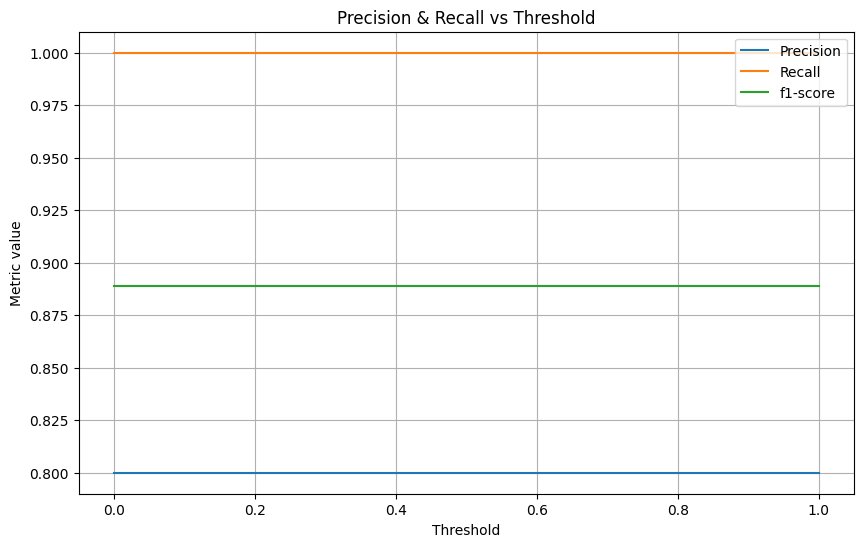

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1_scores, label="f1-score")
plt.xlabel("Threshold")
plt.ylabel("Metric value")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [172]:
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(best_threshold)

pred_log_reg = clf.predict(X_test, best_threshold)
print(pred_log_reg)

accuracy_test = accuracy_score(y_test, pred_knn)
print(accuracy_test)

0.0
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.47058823529411764


In [173]:
!pip install seaborn

In [174]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)

    try:
        auc = roc_auc_score(y_true, y_pred)
    except:
        auc = None

    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"ROC-AUC   : {auc:.4f}" if auc is not None else "ROC-AUC: невозможно вычислить")

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()



=== Trivial Classifier ===
Accuracy  : 0.5294
Precision : 0.5294
Recall    : 1.0000
ROC-AUC   : 0.5000


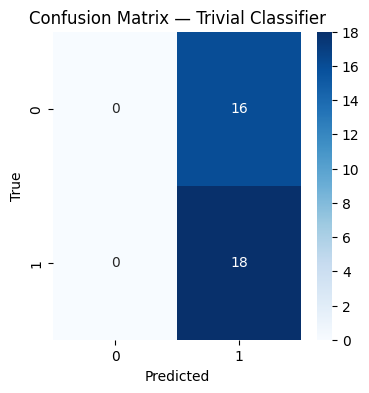


=== Naive Bayes ===
Accuracy  : 0.5294
Precision : 0.5455
Recall    : 0.6667
ROC-AUC   : 0.5208


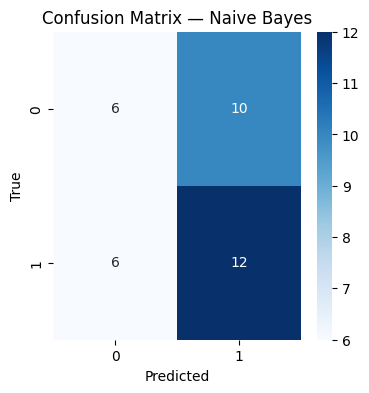


=== KNN ===
Accuracy  : 0.4706
Precision : 0.5000
Recall    : 0.8333
ROC-AUC   : 0.4479


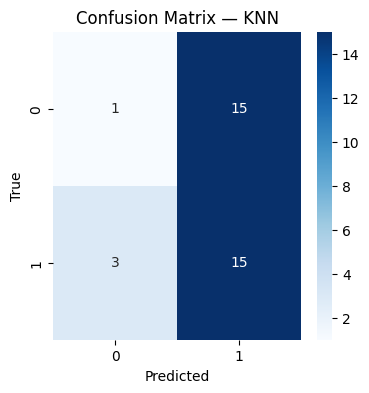


=== Logistic Regression ===
Accuracy  : 0.5294
Precision : 0.5294
Recall    : 1.0000
ROC-AUC   : 0.5000


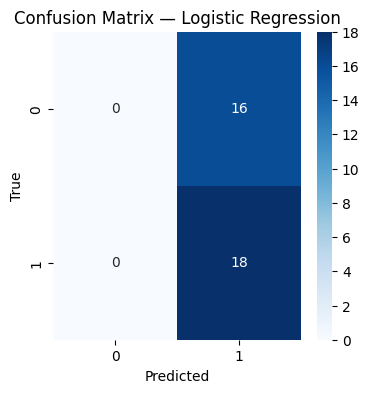

In [175]:
evaluate_model("Trivial Classifier", y_test, pred_trivial)
evaluate_model("Naive Bayes", y_test, pred_naive_bayes)
evaluate_model("KNN", y_test, pred_knn)
evaluate_model("Logistic Regression", y_test, pred_log_reg)


In [176]:
df = pd.read_csv("../datasets/famcs_students.csv")
df_choose =  df.copy()
df_choose = df_choose[["weekend_study", "interest", "bad_sleep", "work_experience", "anime", "social", "sport", "miss", "score", "retake", "literature", "glasses"]]
df_choose.head()

,weekend_study,interest,bad_sleep,work_experience,anime,social,sport,miss,score,retake,literature,glasses
0,Да,Математика,Да,Меньше года,Нет,Экстраверт,"Редко, легкая физкультура",3.0,9.2,0,Да,Нет
1,Нет,Программирование,Нет,1-2 года,Нет,Экстраверт,"Да, я спортсмен",5.0,8.8,0,Да,Нет
2,Да,Программирование,Нет,Меньше года,Нет,Экстраверт,Вообще нет,10.0,8.8,0,Да,Нет
3,Да,Математика,Да,1-2 года,Нет,Экстраверт,"Да, я спортсмен",3.0,8.8,0,Да,Нет
4,Да,Математика,Нет,Не работаю,Нет,Интроверт,Вообще нет,1.0,9.0,0,Да,Нет


In [177]:
col_list = ['weekend_study', 'bad_sleep', 'anime', 'literature', 'glasses']
for col in col_list:
    df_choose[col] = df_choose[col].map({"Да": 1, "Нет": 0})

categorial_columns = ["interest", "work_experience", "social", "sport", "retake"]
print(df_choose.columns.tolist())

for column in categorial_columns:
    for feature in df_choose[column].unique():
        new_col = f"{column}_{feature}"
        df_choose[new_col] = (df_choose[column] == feature).astype(int)

print(df_choose.dtypes)


['weekend_study', 'interest', 'bad_sleep', 'work_experience', 'anime', 'social', 'sport', 'miss', 'score', 'retake', 'literature', 'glasses']
weekend_study                        int64
interest                            object
bad_sleep                            int64
work_experience                     object
anime                                int64
social                              object
sport                               object
miss                               float64
score                              float64
retake                              object
literature                           int64
glasses                              int64
interest_Математика                  int64
interest_Программирование            int64
work_experience_Меньше года          int64
work_experience_1-2 года             int64
work_experience_Не работаю           int64
work_experience_более 2 лет          int64
social_Экстраверт                    int64
social_Интроверт                     int6

In [178]:
df_choose = df_choose.drop(columns=categorial_columns)
print(df_choose.dtypes)

weekend_study                        int64
bad_sleep                            int64
anime                                int64
miss                               float64
score                              float64
literature                           int64
glasses                              int64
interest_Математика                  int64
interest_Программирование            int64
work_experience_Меньше года          int64
work_experience_1-2 года             int64
work_experience_Не работаю           int64
work_experience_более 2 лет          int64
social_Экстраверт                    int64
social_Интроверт                     int64
social_Социофоб                      int64
sport_Редко, легкая физкультура      int64
sport_Да, я спортсмен                int64
sport_Вообще нет                     int64
retake_0                             int64
retake_1                             int64
retake_2+                            int64
dtype: object


In [179]:
X = df_choose.drop(columns=target_column)
X

,weekend_study,bad_sleep,anime,miss,score,literature,interest_Математика,interest_Программирование,work_experience_Меньше года,work_experience_1-2 года,...,work_experience_более 2 лет,social_Экстраверт,social_Интроверт,social_Социофоб,"sport_Редко, легкая физкультура","sport_Да, я спортсмен",sport_Вообще нет,retake_0,retake_1,retake_2+
0,1,1,0,3.0,9.20,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,5.0,8.80,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,1,0,0,10.0,8.80,1,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,1,1,0,3.0,8.80,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,1.0,9.00,1,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0,0,1,1.0,6.29,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
123,1,1,0,0.0,6.00,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
124,0,0,0,10.0,7.00,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
125,1,1,1,1.0,7.00,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0


In [180]:
RANDOM_STATE = 0 

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.7, random_state=RANDOM_STATE)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, train_size=0.15, random_state=RANDOM_STATE)

In [181]:
most_common_class = y_train.value_counts().idxmax()
print("Most common class:", most_common_class)

Most common class: 1


In [182]:
pred_trivial = np.full_like(y_test, fill_value=most_common_class)
accuracy = accuracy_score(y_test, pred_trivial)
print("Accuracy of trivial classifier:", accuracy)

Accuracy of trivial classifier: 0.5294117647058824


In [183]:
test = X_train.select_dtypes(include='object')


In [184]:
feature_types = detect_feature_types(X_train)
print(feature_types)
pred_naive_bayes = naive_bayes_predict_mixed(X_train, y_train, X_test, feature_types)

accuracy_score(y_test, pred_naive_bayes)

['binary', 'binary', 'binary', 'continuous', 'continuous', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary', 'binary']


0.4411764705882353

In [185]:
scores = {}

for k in range(1, len(X_train)):  
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_valid)
    scores[k] = accuracy_score(y_valid, pred)

scores

{1: 0.4,
 2: 0.0,
 3: 0.6,
 4: 0.4,
 5: 0.4,
 6: 0.2,
 7: 0.2,
 8: 0.2,
 9: 0.2,
 10: 0.2,
 11: 0.6,
 12: 0.2,
 13: 0.2,
 14: 0.2,
 15: 0.2,
 16: 0.2,
 17: 0.4,
 18: 0.2,
 19: 0.6,
 20: 0.2,
 21: 0.2,
 22: 0.2,
 23: 0.2,
 24: 0.2,
 25: 0.8,
 26: 0.2,
 27: 0.8,
 28: 0.2,
 29: 0.2,
 30: 0.2,
 31: 0.4,
 32: 0.2,
 33: 0.4,
 34: 0.2,
 35: 0.2,
 36: 0.2,
 37: 0.4,
 38: 0.2,
 39: 0.2,
 40: 0.2,
 41: 0.4,
 42: 0.2,
 43: 0.8,
 44: 0.6,
 45: 0.8,
 46: 0.8,
 47: 0.8,
 48: 0.6,
 49: 0.8,
 50: 0.6,
 51: 0.8,
 52: 0.6,
 53: 0.6,
 54: 0.6,
 55: 0.8,
 56: 0.6,
 57: 0.8,
 58: 0.6,
 59: 0.8,
 60: 0.4,
 61: 0.8,
 62: 0.8,
 63: 0.8,
 64: 0.8,
 65: 0.8,
 66: 0.8,
 67: 0.8,
 68: 0.8,
 69: 0.8,
 70: 0.8,
 71: 0.8,
 72: 0.8,
 73: 0.8,
 74: 0.8,
 75: 0.8,
 76: 0.6,
 77: 0.8,
 78: 0.8,
 79: 0.8,
 80: 0.8,
 81: 0.8,
 82: 0.8,
 83: 0.8,
 84: 0.8,
 85: 0.8,
 86: 0.8,
 87: 0.8}

In [186]:
best_k = max(scores, key=scores.get)
best_k


25

In [187]:
knn_final = KNN(k=best_k)
knn_final.fit(X_train, y_train)

pred_knn = knn_final.predict(X_test)
print(pred_knn)
accuracy_test = accuracy_score(y_test, pred_knn)
accuracy_test


[1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1]


0.6176470588235294

In [188]:
clf = LogisticRegressionScratch(lr=0.01, n_iters=3000)
clf.fit(X_train, y_train)

In [189]:
probs_valid = clf.predict_proba(X_valid)

In [190]:
thresholds = np.linspace(0, 1, 200)

precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    preds = (probs_valid >= t).astype(int)
    precisions.append(precision_score(y_valid, preds, zero_division=0))
    recalls.append(recall_score(y_valid, preds, zero_division=0))
    f1_scores.append(f1_score(y_valid, preds, zero_division=0))

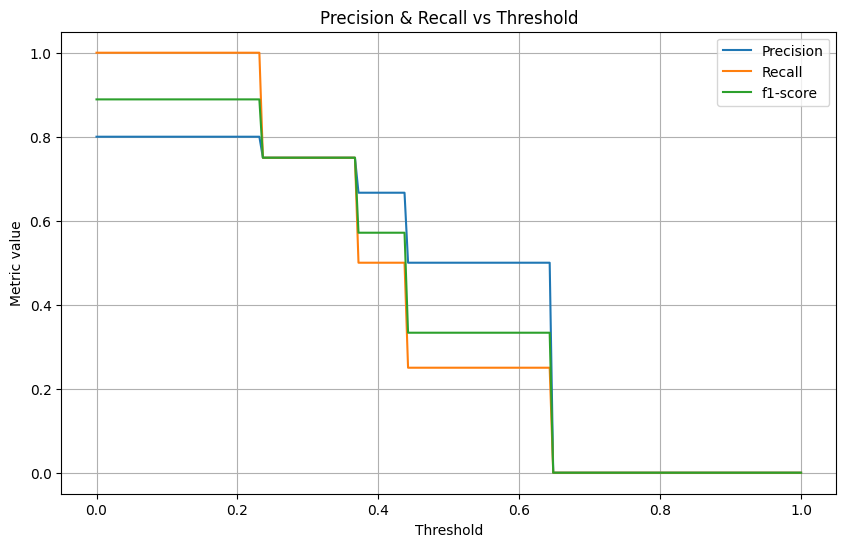

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1_scores, label="f1-score")
plt.xlabel("Threshold")
plt.ylabel("Metric value")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

In [192]:
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_threshold

pred_log_reg = clf.predict(X_test, best_threshold)
print(pred_log_reg)

accuracy_test = accuracy_score(y_test, pred_knn)
print(accuracy_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.6176470588235294



=== Trivial Classifier ===
Accuracy  : 0.5294
Precision : 0.5294
Recall    : 1.0000
ROC-AUC   : 0.5000


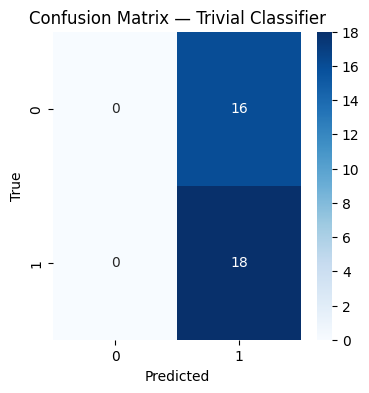


=== Naive Bayes ===
Accuracy  : 0.4412
Precision : 0.4737
Recall    : 0.5000
ROC-AUC   : 0.4375


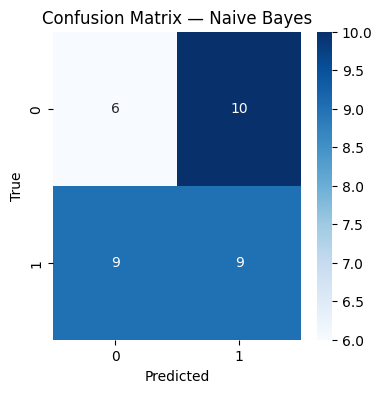


=== KNN ===
Accuracy  : 0.6176
Precision : 0.6087
Recall    : 0.7778
ROC-AUC   : 0.6076


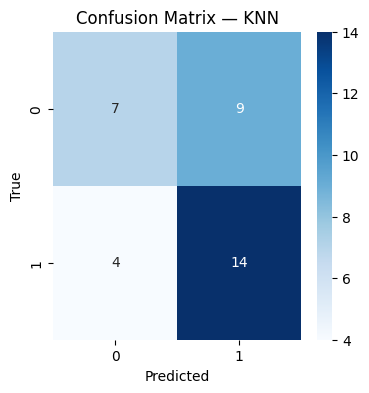


=== Logistic Regression ===
Accuracy  : 0.5294
Precision : 0.5294
Recall    : 1.0000
ROC-AUC   : 0.5000


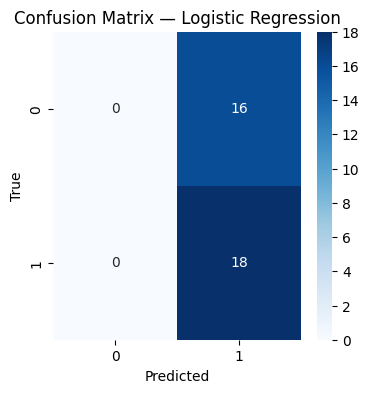

In [193]:
evaluate_model("Trivial Classifier", y_test, pred_trivial)
evaluate_model("Naive Bayes", y_test, pred_naive_bayes)
evaluate_model("KNN", y_test, pred_knn)
evaluate_model("Logistic Regression", y_test, pred_log_reg)